#Long term evolution: all particle interactions

-8.0 1.428134794028789


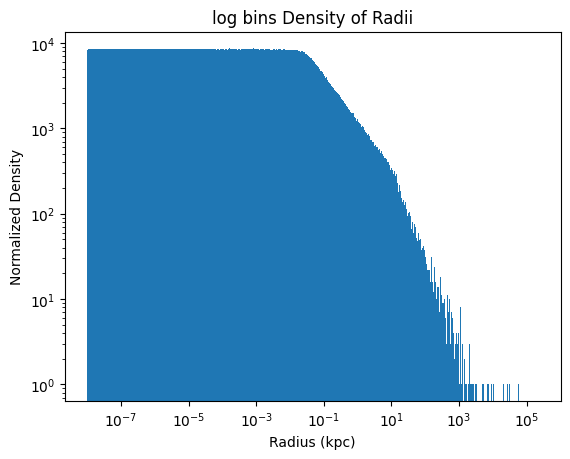

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c

# Constants
G = 6.67430e-11  # Gravitational constant (m^3/kg/s^2)
M_sun = 4e6 * 1.989e30  # Mass of the Galactic centre (kg)
kpc = 30856778570831.268


def circular_orbit_velocity(r, M=M_sun):
    """Compute the circular orbital velocity at radius r."""
    return np.sqrt(G * M / (r * kpc))

def specific_energy(r, v, M=M_sun):
    """Compute specific orbital energy."""
    return (v**2) / 2 - (G * M) / (r* kpc)


def new_orbit_circular(r, delta_v, M=M_sun):
    """Compute new orbital parameters after velocity change in a circular orbit."""

    # Initial velocity for a circular orbit
    v_initial = circular_orbit_velocity(r, M)

    # Apply velocity perturbation (assuming purely tangential boost)
    v_new = v_initial + delta_v

    # Compute new orbital energy
    E_initial = specific_energy(r, v_initial, M)
    E_new = specific_energy(r, v_new, M)

    # Determine new semi-major axis
    if E_new < 0:
        r_new = abs(- (G * M) / (2 * E_new))

        r_new = abs(r_new)
        #print(f"New bound orbit with semi-major axis: {r_new:.2e} m")
        a_new = - (G * M) / (2 * E_new * 1.496e11)
        #print(f"New bound orbit with semi-major axis: {a_new:.2e} AU")
        deltaRadius = (r_new - r)
        #print(f"Change of radius: {deltaRadius:.2e} m")
    if E_new > 0:
        #a_new = r
        r_new = float('nan')#0.5e-3 *1.496e11  # or any other suitable default value
        a_new = float('nan')
        deltaRadius = float('nan')
        E_new = float('nan')
        # continue
        #print("Object has escaped into a hyperbolic trajectory.")

    # Energy change
    delta_E = E_new - E_initial
    #print(f"Change in specific energy: {delta_E:.2e} J/kg")

    return r_new, a_new, deltaRadius, E_new

#Empty lists
radius_dist = []
rad_kpc = []

#velocity distribution: Gaussian definitions from a'_V=1MeV
mu, sigma = 0.01705*c, 0.008733*c # mean and standard deviation


#Distances in kpc
low = 0.00000001 #lower limit of Schwarzchild radius
high = 26.8 #Upper limitog laactric radius of visible matter
size = 3000000


distances_power = np.linspace(np.log10(low), np.log10(high), size)



for number in distances_power:

  radius = 10**number  #Radius of Sagitarrius B in m

# Compute new orbit for particle m

  delta_v_m  = np.random.normal(mu, sigma)


  r_new, a_new, delta_r, E_new = new_orbit_circular(radius, delta_v_m)
  r_new = abs(r_new)
  r_kpc_new = r_new

  if not np.isnan(r_new) and E_new < 0: #and (1e-7 <= r_new/kpc <= 1e7):

    rad_kpc.append(np.sqrt(r_new**2)/kpc)
    radius_dist.append(np.sqrt(r_new**2))

  # Compute new orbit for particle n

  delta_v_n  = -1*np.random.normal(mu, sigma)


  r_new, a_new, delta_r, delta_E = new_orbit_circular(radius, delta_v_n)
  r_new = abs(r_new)
  r_kpc_new = r_new

  if not np.isnan(r_new) and E_new < 0: #and (1e-7 <= r_new/kpc <= 1e7):

    rad_kpc.append(np.sqrt(r_new**2)/kpc)
    radius_dist.append(np.sqrt(r_new**2))



import numpy as np

def logarithmic_bins(data, num_bins):
  """
  Generates logarithmic bins for a given dataset.

  Args:
    data: The input data array.
    num_bins: The desired number of bins.

  Returns:
    An array of bin edges.
  """
  # Convert data to a NumPy array to allow element-wise comparison
  data = np.array(data)

  # Calculate minimum and maximum values (excluding zeros and negative values)
  min_val = np.min(data[data > 0])
  max_val = np.max(data)

  # Generate logarithmic bins
  bins = np.logspace(np.log10(min_val), np.log10(max_val), num_bins + 1)

  return bins

bins = logarithmic_bins(rad_kpc, num_bins=1000)
hist, bins, patches = plt.hist(rad_kpc, bins=bins, log=True)
plt.xlabel('Radius (kpc)')
plt.ylabel('Normalized Density')
plt.title('log bins Density of Radii')
plt.xscale('log')
plt.yscale('log')
plt.show()


#Time evolving states

#Gaussian Speed distributions for small condensates of larger velocities

Normalosation for rates of time evolution given below:


  Sean Tulin and Hai-Bo Yu. “Dark matter self-interactions and small scale structure”.
  In: Physics Reports. Dark matter self-interactions and small scale structure, 730,
  (Feb. 5, 2018), pp. 1–57. ISSN: 0370-1573. DOI: 10.1016/j.physrep.2017.11.004.
  URL: https://www.sciencedirect.com/science/article/pii/S0370157317304039


4.072218330278616e-15 condensate radius
4.243e-25
0.004911328022687755 cross section cm^2/mass g


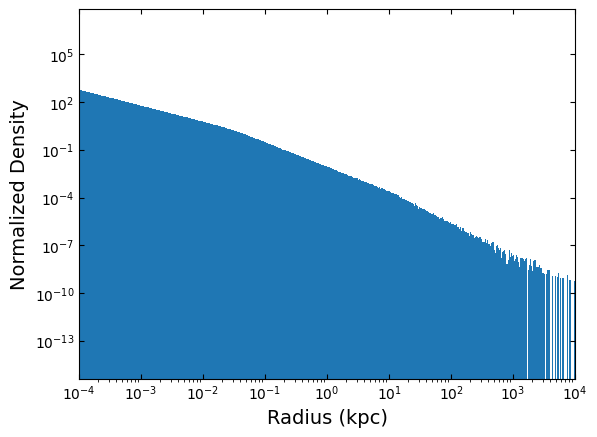

In [ ]:
import random
import time
import sys
import pandas as pd
from random import choices
import numpy as np
from tqdm.auto import tqdm
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
start_time = time.time()
from scipy.constants import c
import matplotlib.pyplot as plt
#Time evolution of initial system
rad_kpc = np.load('/content/drive/MyDrive/rad_kpc.npy')
# bins = logarithmic_bins(rad_kpc, num_bins=1000)
# hist, bins, patches = plt.hist(rad_kpc, bins=bins, density=True, log=True)
rad_kpc = rad_kpc
rad_evolve_kpc = []
array_list = []
bins_list = []
all_hist_data = []  # List to store all histogram data
size = 3000000
totaltime = 1000
rho_0 = 2.5e17 #experimnetal nuclear density kg/m^3
M_hex = 4.243*10**-27 #hexaquark mass


def logarithmic_bins(data, num_bins):
  """
  Generates logarithmic bins for a given dataset.

  Args:
    data: The input data array.image
    num_bins: The desired number of bins.

  Returns:
    An array of bin edges.
  """
  # Convert data to a NumPy array to allow element-wise comparison
  data = np.array(data)

  # Calculate minimum and maximum values (excluding zeros and negative values)
  min_val = np.min(data[data > 0])
  max_val = np.max(data)

  # Generate logarithmic bins
  bins = np.logspace(np.log10(min_val), np.log10(max_val), num_bins + 1)

  return bins


#static initial case
rad_static_kpc = rad_kpc

#condensate parameters; number of hexaquarks and condensate density
##########################################################################
# a'_V  = 1 MeV : num = 10**3                                            #
#                 rho = 6 * rho_0                                        #
#                 mu, sigma = 0.01705*c, 0.008733*c                      #
#                                                                        #
#Cross-over to M-B dist at approx 10^5                                   #
# a'_V  = 10 keV : num = 1.8*10**6                                       #
#                 rho = 6 * rho_0                                        #
#                 mu, sigma = 3.2e-4*c, 1.9e-4*c                         #
##########################################################################


num = 10**2
rho = 6 * rho_0
mu, sigma = 0.01705*c, 0.008733*c # mean and standard deviation
condensate_radius = (3*M_hex*num/(4*np.pi*rho))**(1.0/3) # in m
print(condensate_radius, "condensate radius")
print(M_hex*num)
print(4*np.pi*(100*condensate_radius)**2/(M_hex*1000*num) , "cross section cm^2/mass g")

time_list = []
density_list = []
bins_list = []
radius_dist = []
# Store histogram data for each time step
histogram_data = []
# histogram_data = np.array(histogram_data)  # Shape: (totaltime, len(bins_t)-1)
for t in range(totaltime):
  t += 1
  time_list.append(t)

  #Rate of interaction
  #Normalised values taken from https://www.sciencedirect.com/science/article/pii/S0370157317304039

  normalization_factor = 0.1  # Gyr^-1
  # rho_dm_norm = 0.1  # M_sun/pc^3
  # v_rel_norm = 50.0  # km/s

  sigma_per_m_norm = 1.0 # cm^2/g

  #Adjustable constants given
  #rho_dm =   # M_sun/pc^3
  # v_rel = 50.0  # km/s
  sigma_per_m = 4*np.pi*(100*condensate_radius)**2/(M_hex*1000*num)  # cm^2/g

  # Calculate the scattering rate
  rate = normalization_factor   * (sigma_per_m / sigma_per_m_norm) #* (rho_dm / rho_dm_norm)#(v_rel / v_rel_norm)
  sample = int(size * rate)

  rad_temp_kpc = []

  #choosing new radii of interactiojn based on
  sample_radius = np.asarray(random.choices(bins[:-1], weights=hist, k=sample))
  index = 0
  # initial_radii = sample_radius
  for i,value in enumerate((sample_radius)):
    # index += 1
    radius = value  #Radius of Sagitarrius B in m

    delta_v_m  = np.random.normal(mu, sigma)


    r_new, a_new, delta_r, E_new = new_orbit_circular(radius, delta_v_m)
    # r_new = abs(r_new)
    r_kpc_new = abs(r_new)

    if not np.isnan(r_new) and E_new < 0 and (1e-7 <= r_new/kpc <= 1e7):
      rad_temp_kpc.append(r_kpc_new)  # Replace old radius with new

    # Compute new orbit for particle n
    delta_v_n  = -1*np.random.normal(mu, sigma)


    r_new, a_new, delta_r, delta_E = new_orbit_circular(radius, delta_v_n)
    r_new = abs(r_new)
    r_kpc_new = r_new

    if not np.isnan(r_new) and E_new < 0 and (1e-7 <= r_new/kpc <= 1e7):
      rad_temp_kpc.append(r_kpc_new)  # Replace old radius with new


  #Adding new values and removing duplicates of moved ones
  rad_static_kpc = np.setdiff1d(rad_static_kpc, sample_radius)
  rad_static_kpc = np.concatenate((rad_static_kpc, rad_temp_kpc))
  rad_evolve_kpc = rad_static_kpc

  bins_t = logarithmic_bins(rad_evolve_kpc, num_bins=1000)
  hist_t, bins_t, _ = plt.hist(rad_evolve_kpc, bins=bins_t, density=True, log=True)
  bins_t_center = np.sqrt(bins_t[:-1] * bins_t[1:])


  histogram_data.append((hist_t, rad_evolve_kpc.copy()))

  radius_dist.append(rad_evolve_kpc)  # Use extend for lists

  size = rate  * size
  radius_dist.append(rad_evolve_kpc.copy())

rad_low_kpc = rad_evolve_kpc

hist, bins, patches = plt.hist(rad_low_kpc, bins=bins_t, density=True)#, log=True)

plt.rcParams['font.size'] = 12  # Adjust font size as needed
plt.tick_params(direction='in', top=True, right=True)  # Ticks inside the plot
plt.xlabel('Radius (kpc)', fontsize=14)  # Increase label font size
plt.ylabel('Density', fontsize=14)  # Increase label font size
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4, 1e4)

plt.show()

#Maxwell-Boltzmann Speed distributions for large condensates of lower velocities

2.299262499757152e-13 condensate radius
7.6374e-20
8.698441348959717e-05 cross section/mass


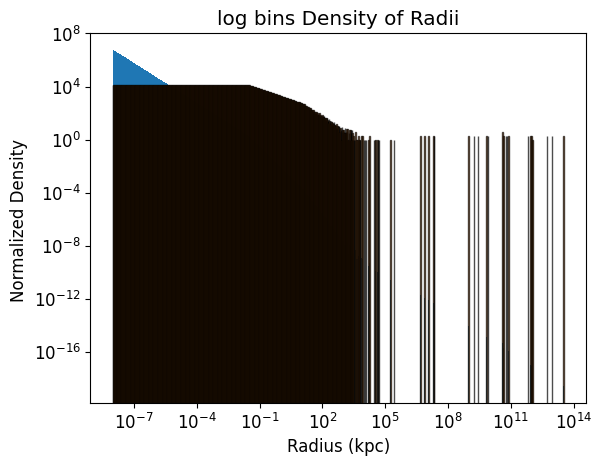

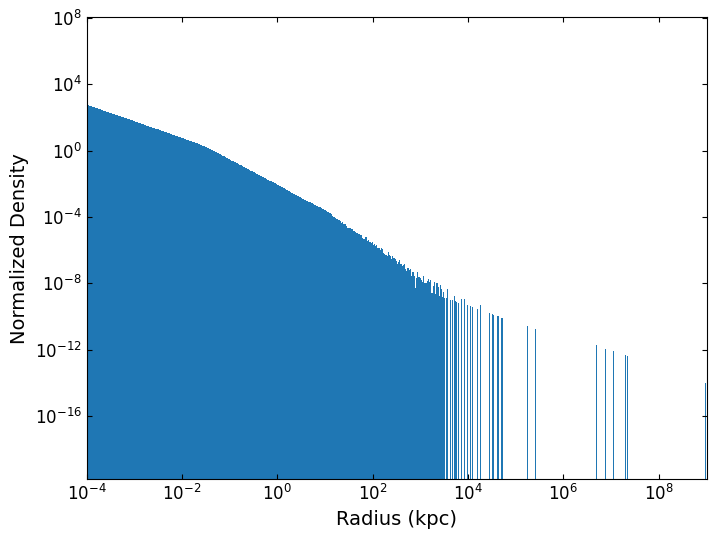

Task took: 1354.14 seconds


In [ ]:
import random
import time
import sys
import scipy.stats as stats
from random import choices
import numpy as np
from tqdm.auto import tqdm
import scipy.constants as const
c = const.c

start_time = time.time()
#Time evolution of initial system
rad_evolve_kpc = []
array_list = []
size = 3000000
totaltime = 1000
rho_0 = 2.5e17 #experimnetal nuclear density kg/m^3
M_hex = 4.243*10**-27 #hexaquark mass

#Most probable speed of Maxwell-Boltzmann Dist of speed
v_p = 0.0002*c
a = v_p/np.sqrt(2)
maxwell_dist = stats.maxwell(scale = a)

#Method is the same from here onwards

rad_kpc = np.load('/content/drive/MyDrive/rad_kpc.npy')

def logarithmic_bins(data, num_bins):
  """
  Generates logarithmic bins for a given dataset.

  Args:
    data: The input data array.image
    num_bins: The desired number of bins.

  Returns:
    An array of bin edges.
  """
  # Convert data to a NumPy array to allow element-wise comparison
  data = np.array(data)

  # Calculate minimum and maximum values (excluding zeros and negative values)
  min_val = np.min(data[data > 0])
  max_val = np.max(data)

  # Generate logarithmic bins
  bins = np.logspace(np.log10(min_val), np.log10(max_val), num_bins + 1)

  return bins


#static initial case
rad_static_kpc = rad_kpc

#condensate parameters; number of hexaquarks and condensate density
##########################################################################
# a'_V  = 1 MeV : num = 10**3                                            #
#                 rho = 6 * rho_0                                        #
#                 mu, sigma = 0.01705*c, 0.008733*c                      #
#                                                                        #
#Cross-over to M-B dist at approx 10^5                                   #
# a'_V  = 10 keV : num = 1.8*10**6                                       #
#                 rho = 6 * rho_0                                        #
#                 mu, sigma = 3.2e-4*c, 1.9e-4*c                         #
##########################################################################

#number of hexaquarks
num = 1.8e7

#condensate density
rho = 6 * rho_0


condensate_radius = (3*M_hex*num/(4*np.pi*rho))**(1.0/3)
print(condensate_radius, "condensate radius")
print(M_hex*num)
print(4*np.pi*(100*condensate_radius)**2/(M_hex*1000*num)  , "cross section/mass")

for t in range(totaltime):
  t += 1

  #rate of interaction
  normalization_factor = 0.1  # Gyr^-1
  # rho_dm_norm = 0.1  # M_sun/pc^3
  # v_rel_norm = 50.0  # km/s

  sigma_per_m_norm = 1.0 # cm^2/g

  #Adjustable constants
  #rho_dm = hist  # M_sun/pc^3
  # v_rel = 50.0  # km/s
  #for condensate of area given by 4π^2 and mass of number hexaquarks times indiivdual hexaquark mass
  sigma_per_m = 4*np.pi*(100*condensate_radius)**2/(M_hex*1000*num)  # cm^2/g

  # Calculate the scattering rate
  rate = normalization_factor   * (sigma_per_m / sigma_per_m_norm) #* (rho_dm / rho_dm_norm)#(v_rel / v_rel_norm)
  sample = int(size * rate)

  rad_temp_kpc = []

  #choosing new radii of interactiojn based on M-B dist
  sample_radius = np.asarray(random.choices(bins[:-1], weights=hist, k=sample))
  index = 0
  delta_v_m_array  = maxwell_dist.rvs(size=int(size))#np.random.normal(mu, sigma)
  delta_v_n_array  = -1*maxwell_dist.rvs(size=int(size))#np.random.normal(mu, sigma)


  # initial_radii = sample_radius
  for i,value in enumerate((sample_radius)):

    #Compute particle m
    radius = value  #Radius of Sagitarrius B in m
    delta_v_m = delta_v_m_array[i]

    r_new, a_new, delta_r, E_new = new_orbit_circular(radius, delta_v_m)

    r_kpc_new = abs(r_new)

    if not np.isnan(r_new) and E_new < 0 and (1e-7 <= r_new/kpc <= 1e7):
      rad_temp_kpc.append(r_kpc_new)  # Replace old radius with new

    # Compute new orbit for particle n
    delta_v_n = delta_v_n_array[i]
    r_new, a_new, delta_r, delta_E = new_orbit_circular(radius, delta_v_n)
    r_new = abs(r_new)
    r_kpc_new = r_new

    if not np.isnan(r_new) and E_new < 0 and (1e-7 <= r_new/kpc <= 1e7):
      rad_temp_kpc.append(r_kpc_new)  # Replace old radius with new

  rad_static_kpc = np.setdiff1d(rad_static_kpc, sample_radius)
  rad_static_kpc = np.concatenate((rad_static_kpc, rad_temp_kpc))
  rad_evolve_kpc = rad_static_kpc

  bins_t = logarithmic_bins(rad_evolve_kpc, num_bins=1000)

  hist_t, bins, patches = plt.hist(rad_evolve_kpc, bins=bins_t, density=True, log=True)

  size = rate  * size

# bins = logarithmic_bins(rad_kpc, num_bins=1000)
hist, bins, patches = plt.hist(rad_evolve_kpc, bins=bins_t, density=True, log=True)
rad_high_kpc = rad_evolve_kpc

# Set plot aesthetics for publication
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
# plt.rcParams['font.family'] = 'serif'  # Use a serif font (e.g., Times New Roman)
hist, bins, patches = plt.hist(rad_high_kpc, bins=bins_t, density=True)#, log=True)

plt.rcParams['font.size'] = 12  # Adjust font size as needed
plt.tick_params(direction='in', top=True, right=True)  # Ticks inside the plot
plt.xlabel('Radius (kpc)', fontsize=14)  # Increase label font size
plt.ylabel('Normalized Density', fontsize=14)  # Increase label font size
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4, 1e4)


# Save the figure
plt.savefig('distribution_time_mb_plot.pdf', bbox_inches='tight')  # Save as PDF for high quality

plt.rcParams['font.size'] = 12  # Adjust font size as needed
plt.tick_params(direction='in', top=True, right=True)  # Ticks inside the plot
plt.xlabel('Radius (kpc)', fontsize=14)  # Increase label font size
plt.ylabel('Normalized Density', fontsize=14)  # Increase label font size
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4, 1e9)

# Show the plot
plt.show()


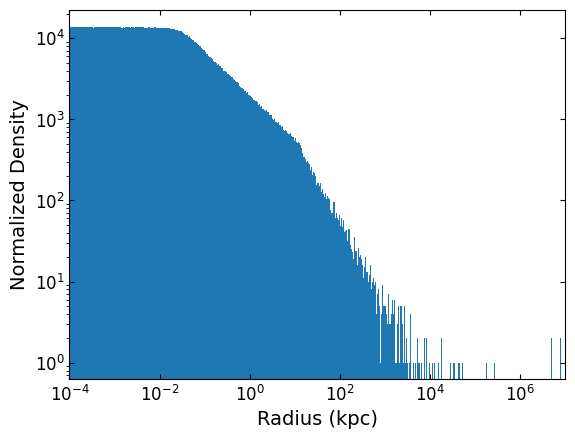